In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm

#pm.help()
pm.init(debug=True)
pm.info()
df_jo = pm.df('df_jo')
df_jo.info()

Lista de dataframes: ['cr', 'fe', 'cr_cp', 'fe_cp', 'df_jo', 'df_jall']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32094 non-null  int64          
 1   amount                      32094 non-null  float64        
 2   stat_cr                     32094 non-null  object         
 3   created_at                  32094 non-null  datetime64[ns] 
 4   user_id                     32094 non-null  int64          
 5   active                      32094 non-null  int64          
 6   moderated_at                21759 non-null  datetime64[ns] 
 7   reimbursement_date          32094 non-null  datetime64[ns] 
 8   cash_request_received_date  24149 non-null  datetime64[ns] 
 9   money_back_date             23917 non-null  datetime64[ns] 
 10  transfer_type               32094 

In [2]:
# Filtrar filas con estado de fees "accepted"
#df_jo = df_jo[df_jo['stat_fe'] == 'accepted']

# Filtrar filas con tipo de transferencia "regular" o "instant"
#df_jo = df_jo[df_jo['transfer_type'] == 'instant']

# Excluir datos de noviembre de 2020
df_jo = df_jo[~((df_jo['Mes_created_at'].dt.year == 2020) & (df_jo['Mes_created_at'].dt.month == 11))]

# Calcular métricas mensuales
monthly_data = df_jo.groupby('Mes_created_at').agg(
    total_fees=('fee', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

# Mostrar la evolución mensual
print(monthly_data)


   Mes_created_at  total_fees  total_adelantos  fees_ratio
0         2019-11         0.0              1.0    0.000000
1         2019-12         0.0          27297.0    0.000000
2         2020-01         0.0          21587.0    0.000000
3         2020-02         0.0          16653.0    0.000000
4         2020-03         0.0          23549.0    0.000000
5         2020-04         5.0          46093.0    0.010848
6         2020-05      1285.0          94406.0    1.361142
7         2020-06      8725.0         344186.0    2.534967
8         2020-07     10395.0         436097.0    2.383644
9         2020-08     17565.0         446645.0    3.932653
10        2020-09     22935.0         503922.0    4.551300
11        2020-10     43815.0         709233.0    6.177801


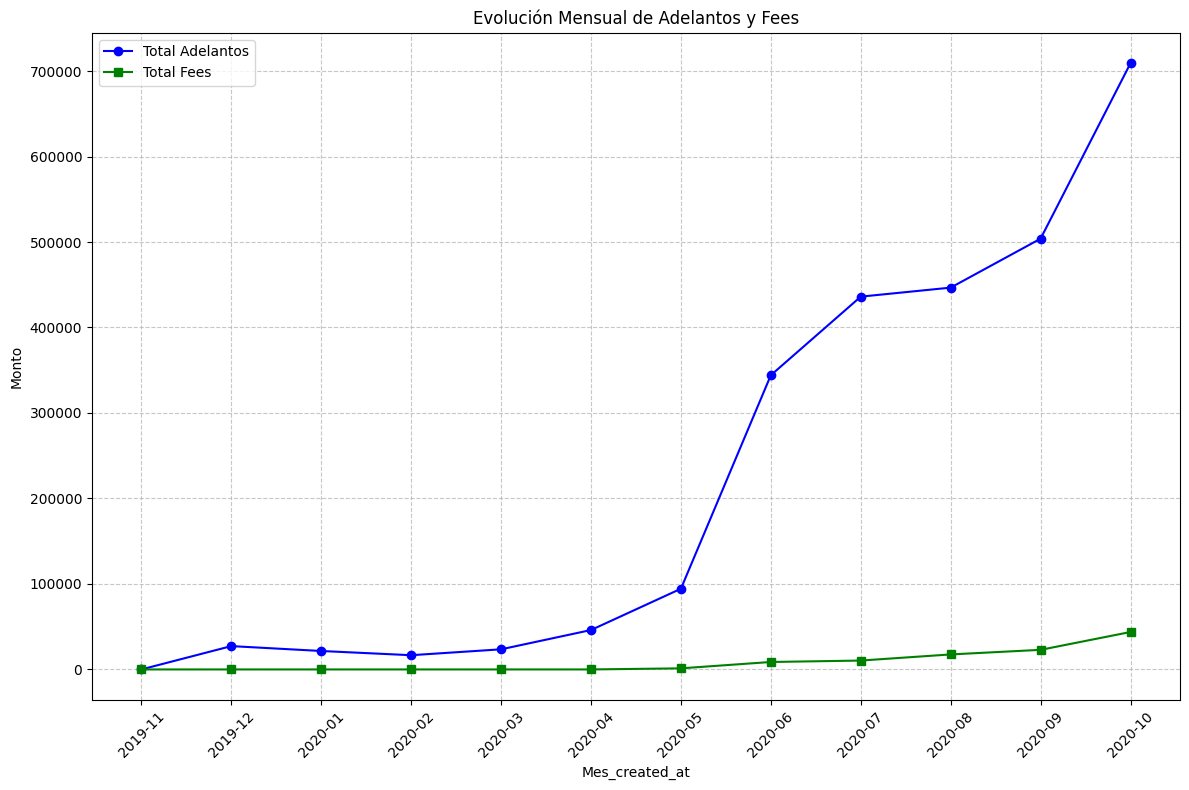

In [3]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar adelantos y fees en el mismo eje y
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_adelantos'], 
    marker='o', 
    label='Total Adelantos', 
    color='blue'
)
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_fees'], 
    marker='s', 
    label='Total Fees', 
    color='green'
)

# Configurar etiquetas y título
ax.set_xlabel('Mes_created_at')
ax.set_ylabel('Monto')
ax.set_title('Evolución Mensual de Adelantos y Fees')
ax.legend()  # Mostrar la leyenda para las líneas
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


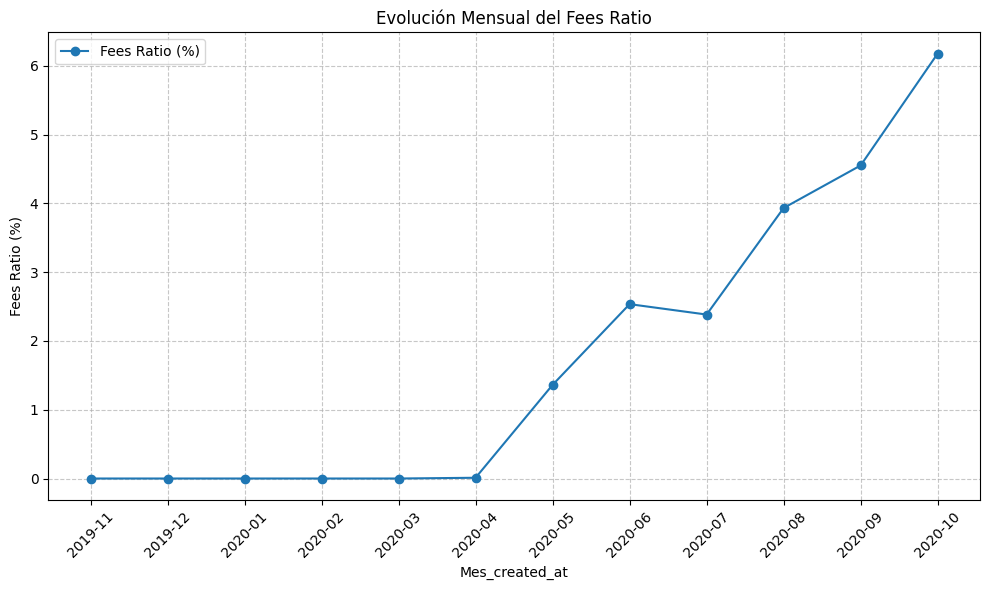

In [4]:
# Graficar la evolución del fees_ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Mes_created_at'].astype(str), monthly_data['fees_ratio'], marker='o', label='Fees Ratio (%)')
plt.title('Evolución Mensual del Fees Ratio')
plt.xlabel('Mes_created_at')
plt.ylabel('Fees Ratio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Calcular las métricas mensuales segregadas por transfer_type
monthly_data = df_jo.groupby(['Mes_created_at', 'transfer_type']).agg(
    total_fees=('fee', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

monthly_data

,Mes_created_at,transfer_type,total_fees,total_adelantos,fees_ratio
0,2019-11,regular,0.0,1.0,0.000000
1,2019-12,regular,0.0,27297.0,0.000000
2,2020-01,regular,0.0,21587.0,0.000000
3,2020-02,regular,0.0,16653.0,0.000000
4,2020-03,regular,0.0,23549.0,0.000000
5,2020-04,regular,5.0,46093.0,0.010848
6,2020-05,regular,1285.0,94406.0,1.361142
7,2020-06,regular,8725.0,344186.0,2.534967
8,2020-07,instant,1390.0,40669.0,3.417837
9,2020-07,regular,9005.0,395428.0,2.277279


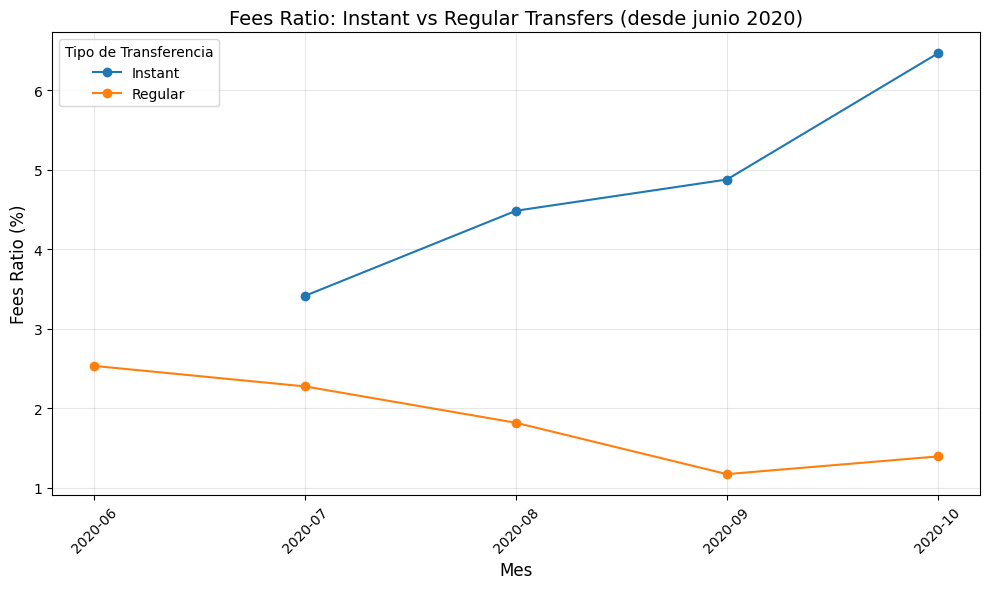

In [7]:
# Filtrar datos desde junio de 2020
monthly_data_filtered = monthly_data[monthly_data['Mes_created_at'] >= '2020-06']

# Pivotar los datos para facilitar la gráfica
pivot_data = monthly_data_filtered.pivot(index='Mes_created_at', columns='transfer_type', values='fees_ratio')

# Asegurarse de que el índice sea un string para graficar
pivot_data.index = pivot_data.index.astype(str)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['instant'], label='Instant', marker='o')
plt.plot(pivot_data.index, pivot_data['regular'], label='Regular', marker='o')

# Personalizar la gráfica
plt.title('Fees Ratio: Instant vs Regular Transfers (desde junio 2020)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Fees Ratio (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transferencia')
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



In [8]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
df_jo['Cohorte'] = df_jo.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
df_jo.head(10)

,id_cr,amount,stat_cr,created_at,user_id,active,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,...,to_date,charge_moment,cr_received_date,to_receive_ini,to_receive_bank,to_reimbur,to_reimbur_cash,to_end,to_send,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873,804,1,2019-12-11 16:47:42.405646,2020-01-09 19:05:21.596363,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999490,NaT,NaT,NaT,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780,231,1,2019-12-11 14:24:22.897988,2020-01-09 19:50:12.347780,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,30 days 00:00:00,NaT,NaT,NaT,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460,191,1,2019-12-11 09:46:59.777728,2020-01-09 19:13:35.825041,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999581,NaT,NaT,NaT,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172,761,1,2019-12-18 14:26:18.128407,2020-01-09 19:16:10.879606,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999434,NaT,NaT,NaT,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376,7686,1,2020-05-07 09:21:55.320193,2020-06-05 22:00:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,30 days 12:00:21.122624,NaT,NaT,NaT,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432,9489,1,2020-05-24 12:40:33.054910,2020-06-06 22:00:00.000000,2020-05-26,2020-07-06 03:36:03.023521,...,NaT,NaN,2020-05-26,2 days 03:01:04.870568,NaT,14 days 01:01:04.870568,NaT,-30 days +18:23:56.976479,NaT,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652,14631,1,2020-06-17 10:21:21.360742,2020-07-11 23:51:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,25 days 06:43:21.547348,NaT,NaT,NaT,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270,99000309,0,2020-02-10 09:11:21.350695,2020-03-11 01:11:53.807930,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999660,NaT,NaT,NaT,2020-01
8,5672,100.0,canceled,2020-06-28 12:06:33.712840,99002499,0,NaT,2020-07-07 22:00:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,9 days 09:53:26.287160,NaT,NaT,NaT,2020-06
9,71,90.0,rejected,2019-12-10 19:51:23.911206,897,1,2019-12-12 15:06:11.190299,2019-12-17 19:51:23.910748,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,6 days 23:59:59.999542,NaT,NaT,NaT,2019-12


In [17]:
# Agrupar los datos por cohorte y mes para calcular las métricas mensuales
cohort_analysis = df_jo.groupby(['Cohorte', 'Mes_created_at']).agg(
    Num_Clientes=('user_id', 'nunique'),  # Número de clientes únicos por cohorte y mes
    Num_Solicitudes=('id_cr', 'nunique'),  # Total de solicitudes únicas por cohorte y mes
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),  # Solicitudes tipo 'instant' por cohorte y mes
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),  # Solicitudes tipo 'regular' por cohorte y mes
    Clientes_con_fees=('fee', lambda x: (x > 0).sum()),  # Clientes con fees por cohorte y mes
    CR=('amount', 'sum'),  # Total de adelantos por cohorte y mes
    Fees=('fee', 'sum'),  # Total de fees por cohorte y mes
    # Contar las líneas con 'stat_fe' == 'accepted'
    paid_fees=('stat_fe', lambda x: (x == 'accepted').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_fees=('stat_fe', lambda x: (x != 'accepted').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),
     # Contar las líneas con 'stat_cr' == 'money_back'
    paid_cr=('stat_cr', lambda x: (x == 'money_back').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_cr=('stat_cr', lambda x: (x != 'money_back').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] != 'money_back'].sum()),
    # Métrica de "credit lapse" (diferencia entre reimbursement_date y created_at)
    credit_lapse=('reimbursement_date', lambda x: (x - df_jo.loc[x.index, 'created_at']).dt.days.mean()),
    # Métrica de "credit payment lapse" (diferencia entre money_back_date y reimbursement_date)
    credit_payment_lapse=('money_back_date', lambda x: (x - df_jo.loc[x.index, 'reimbursement_date']).dt.days.mean())

).reset_index()

# Calcular los porcentajes de non_paid_fees
cohort_analysis['paid_fees_percent_qty'] = (cohort_analysis['paid_fees'] / (cohort_analysis['paid_fees'] + cohort_analysis['non_paid_fees']))
cohort_analysis['paid_fees_percent_amount'] = (cohort_analysis['total_paid_fees'] / cohort_analysis['Fees'])*100  # % en monto
cohort_analysis['paid_cr_percent_qty'] = (cohort_analysis['paid_cr'] / (cohort_analysis['paid_cr'] + cohort_analysis['non_paid_cr']))
cohort_analysis['paid_cr_percent_amount'] = (cohort_analysis['total_paid_cr'] / cohort_analysis['CR'])   # % en monto

# Eliminar las columnas de pago y no pago
cohort_sizes_monthly = cohort_analysis.drop(
    ['paid_fees', 'non_paid_fees', 'total_paid_fees', 'total_non_paid_fees','paid_cr', 'non_paid_cr', 'total_paid_cr', 'total_non_paid_cr'], axis=1, errors='ignore')

# Mostrar los resultados de las cohortes por mes
cohort_analysis


,Cohorte,Mes_created_at,Num_Clientes,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,paid_fees,...,paid_cr,non_paid_cr,total_paid_cr,total_non_paid_cr,credit_lapse,credit_payment_lapse,paid_fees_percent_qty,paid_fees_percent_amount,paid_cr_percent_qty,paid_cr_percent_amount
0,2019-11,2019-11,1,1,0,1,0,1.0,0.0,0,...,0,1,0.0,1.0,16.000000,NaN,0.000000,NaN,0.000000,0.000000
1,2019-11,2019-12,1,1,0,1,0,100.0,0.0,0,...,0,1,0.0,100.0,6.000000,NaN,0.000000,NaN,0.000000,0.000000
2,2019-11,2020-04,1,1,0,1,0,100.0,0.0,0,...,1,0,100.0,0.0,14.000000,8.000000,0.000000,NaN,1.000000,1.000000
3,2019-11,2020-05,1,1,0,5,5,50.0,25.0,1,...,5,0,50.0,0.0,125.000000,-45.000000,0.200000,20.000000,1.000000,1.000000
4,2019-11,2020-08,1,1,2,0,2,20.0,10.0,2,...,2,0,20.0,0.0,55.000000,-8.000000,1.000000,100.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-08,2020-09,291,342,433,59,351,35520.0,1755.0,253,...,313,179,23710.0,11810.0,34.894309,7.150150,0.514228,72.079772,0.636179,0.667511
69,2020-08,2020-10,245,279,310,29,283,26710.0,1415.0,230,...,296,43,23430.0,3280.0,24.241888,4.027027,0.678466,81.272085,0.873156,0.877200
70,2020-09,2020-09,1988,2220,3157,204,2378,263957.0,11890.0,1642,...,2175,1186,178508.0,85449.0,31.353764,9.304796,0.488545,69.049622,0.647129,0.676277
71,2020-09,2020-10,679,727,866,70,845,65520.0,4225.0,634,...,819,117,57935.0,7585.0,24.603632,4.123040,0.677350,75.029586,0.875000,0.884234


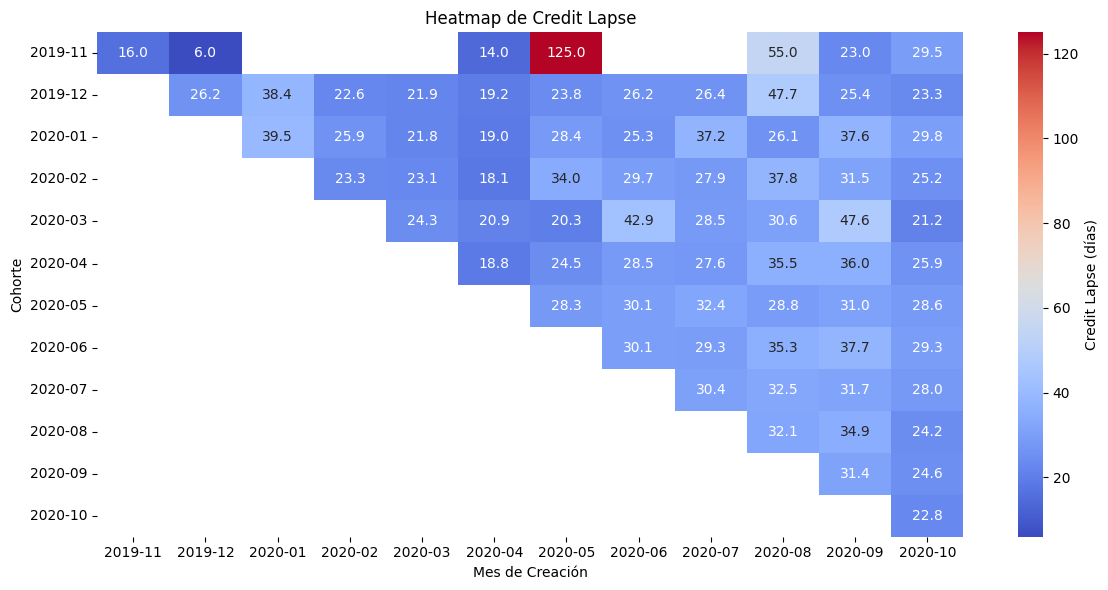

In [174]:
# Crear los datos para el heatmap
heatmap_data = cohort_analysis.pivot(
    index='Cohorte', 
    columns='Mes_created_at', 
    values='credit_lapse'
)

# Crear la figura para el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Credit Lapse (días)'}
)

# Personalizar el heatmap
plt.title('Heatmap de Credit Lapse')
plt.xlabel('Mes de Creación')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()


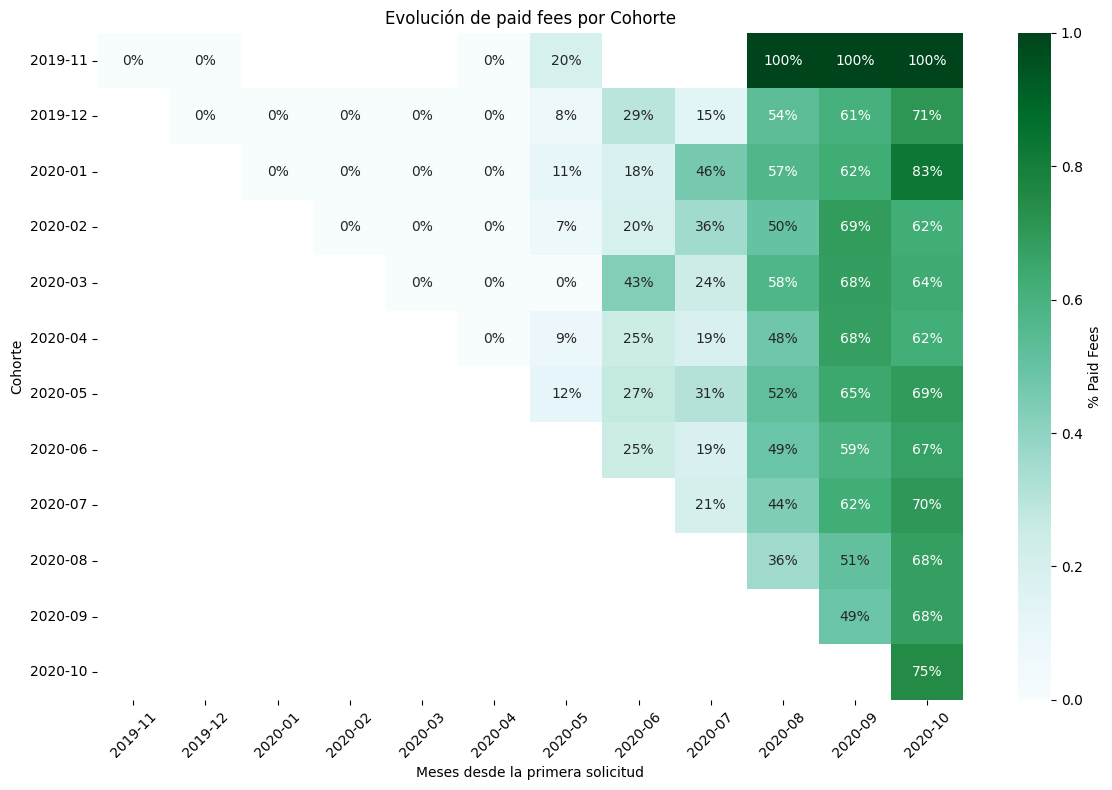

In [175]:
# Pivotar los datos para crear una matriz de fees pagados por cohorte para cada mes
paid_fees_heatmap_data = cohort_analysis.pivot(index='Cohorte', columns='Mes_created_at', values='paid_fees_percent_qty')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paid_fees_heatmap_data, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': '% Paid Fees'})

# Añadir etiquetas y título
plt.title('Evolución de paid fees por Cohorte')
plt.xlabel('Meses desde la primera solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)

# Mostrar el heatmap
plt.tight_layout()
plt.show()


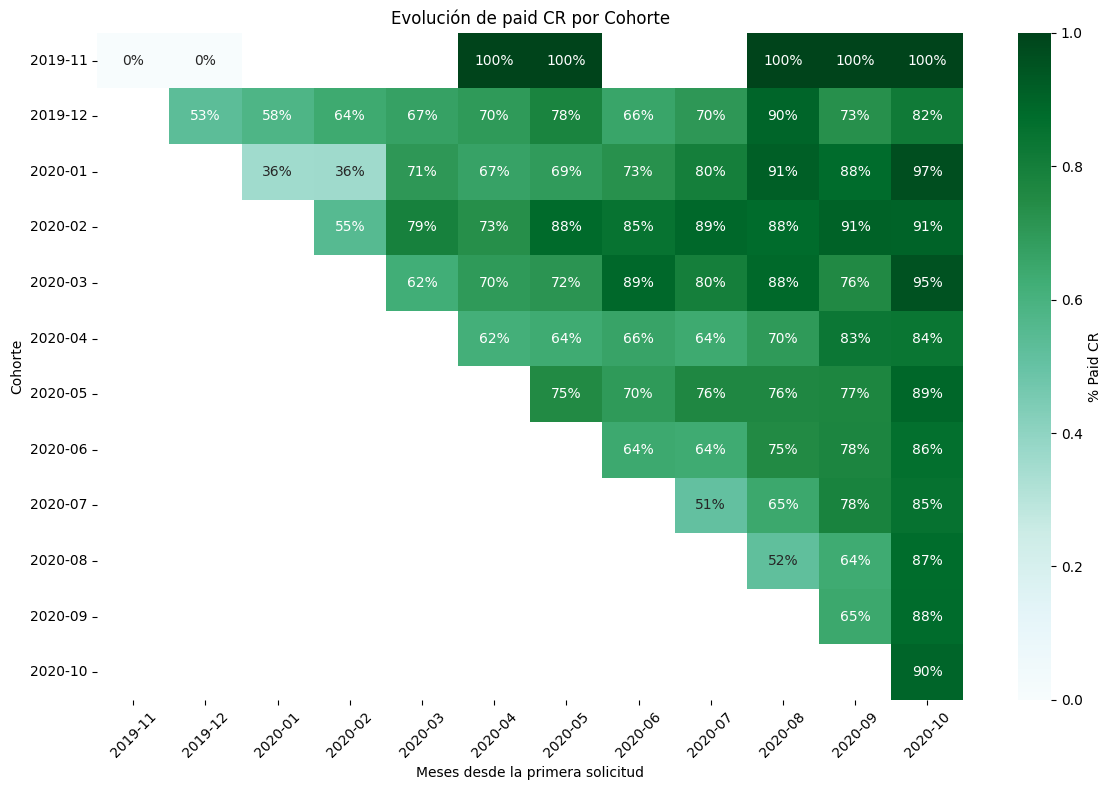

In [173]:
# Pivot the data to create a matrix of paid_cr per cohort for each month
paid_cr_heatmap_data = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='paid_cr_percent_qty')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paid_cr_heatmap_data, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': '% Paid CR'})

# Add labels and title
plt.title('Evolución de paid CR por Cohorte')
plt.xlabel('Meses desde la primera solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)

# Show the heatmap
plt.tight_layout()
plt.show()

In [179]:
cohort_ltv_monthly = cohort_analysis.groupby(['Cohorte', 'Mes_created_at']).agg(
    Total_Fees=('Fees', 'sum'),  
    Clientes=('Num_Clientes', 'sum') 
).reset_index()


# Calcular el LTV mensual
cohort_ltv_monthly['LTV_Mensual'] = cohort_ltv_monthly['Total_Fees'] / cohort_ltv_monthly['Clientes']
cohort_ltv_monthly

,Cohorte,Mes_created_at,Total_Fees,Clientes,LTV_Mensual
0,2019-11,2019-11,0.0,1,0.000000
1,2019-11,2019-12,0.0,1,0.000000
2,2019-11,2020-04,0.0,1,0.000000
3,2019-11,2020-05,25.0,1,25.000000
4,2019-11,2020-08,10.0,1,10.000000
...,...,...,...,...,...
68,2020-08,2020-09,1755.0,291,6.030928
69,2020-08,2020-10,1415.0,245,5.775510
70,2020-09,2020-09,11890.0,1988,5.980885
71,2020-09,2020-10,4225.0,679,6.222386


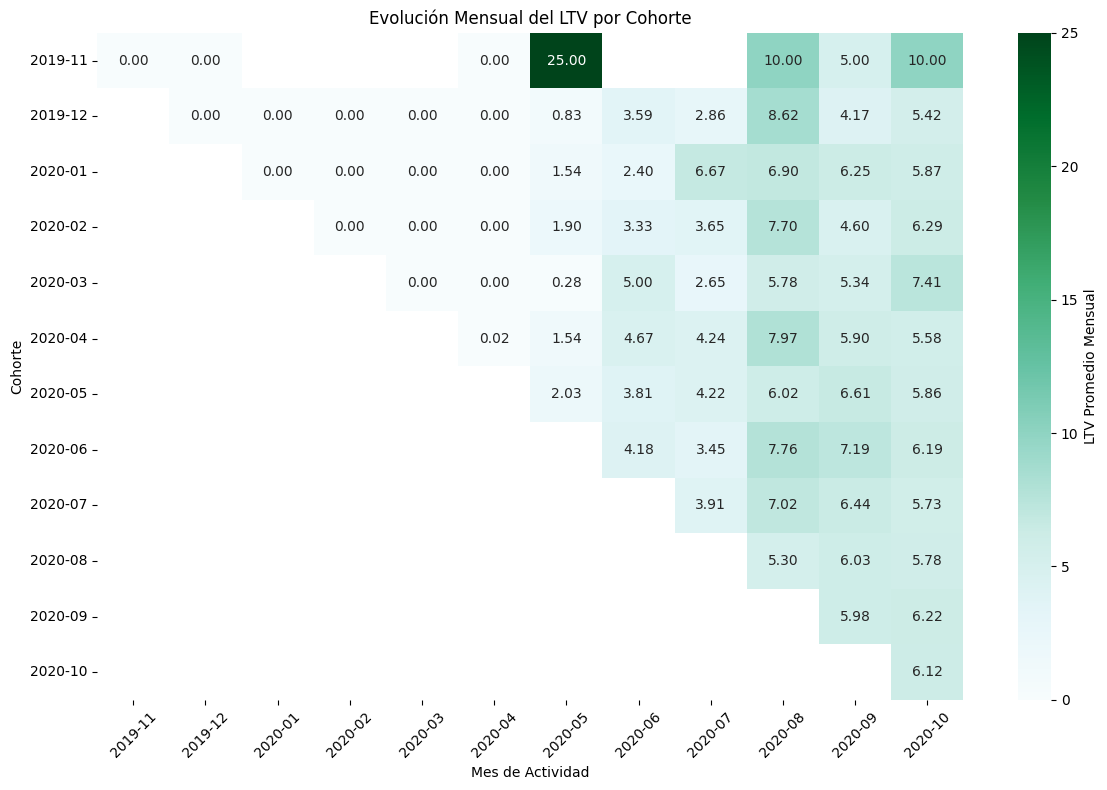

In [180]:
# Reorganizar los datos en una matriz para el heatmap
ltv_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='LTV_Mensual')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=ltv_matrix, annot=True, fmt='.2f', cmap='BuGn', cbar_kws={'label': 'LTV Promedio Mensual'})
plt.title('Evolución Mensual del LTV por Cohorte')
plt.xlabel('Mes de Actividad')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

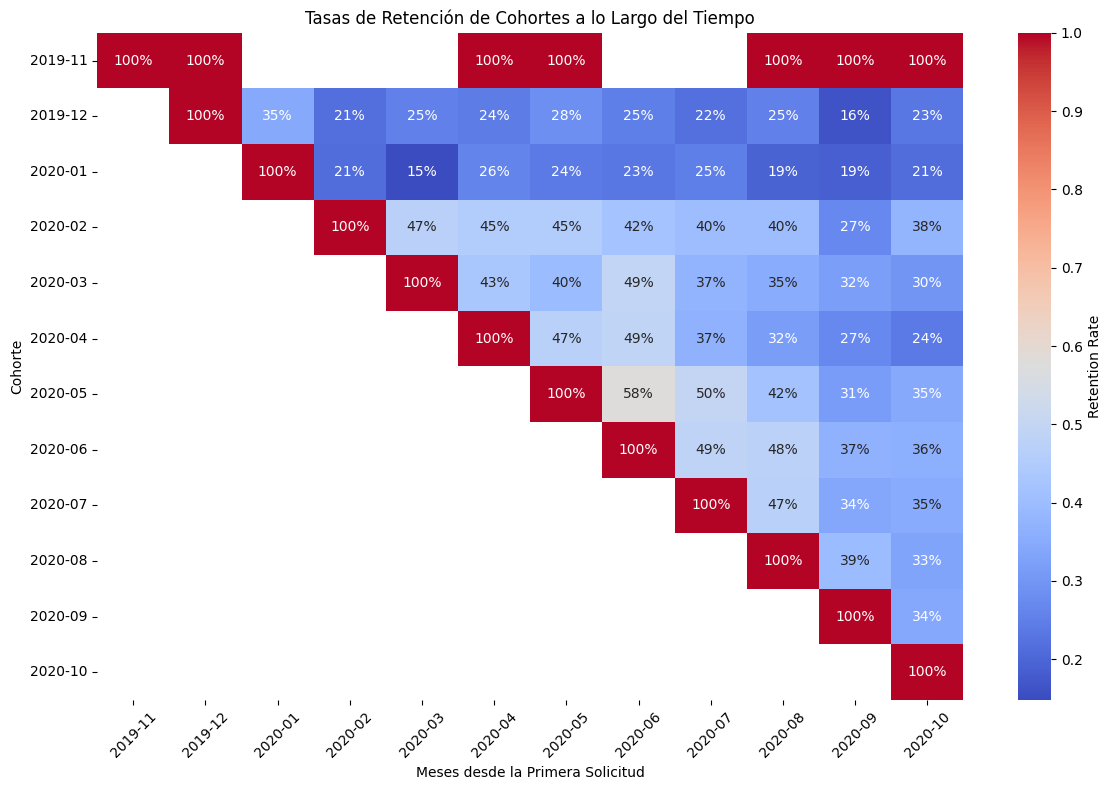

In [181]:
# Calcular el tamaño inicial de las cohortes (primer mes de cada cohorte)
cohort_ltv_monthly['Clientes_Iniciales'] = cohort_ltv_monthly.groupby('Cohorte')['Clientes'].transform('first')

# Calcular las tasas de retención
cohort_ltv_monthly['Retention_Rate'] = cohort_ltv_monthly['Clientes'] / cohort_ltv_monthly['Clientes_Iniciales']

# Crear una matriz de retención
retention_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='Retention_Rate')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix, 
    annot=True, 
    fmt='.0%', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Tasas de Retención de Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




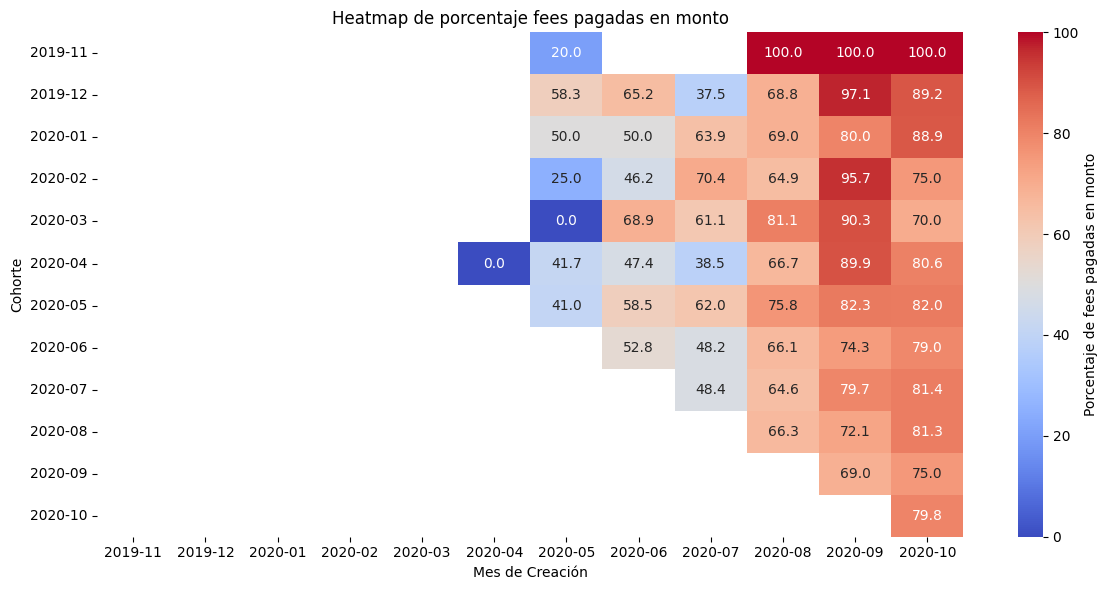

In [18]:
# Crear los datos para el heatmap
heatmap_data = cohort_analysis.pivot(
    index='Cohorte', 
    columns='Mes_created_at', 
    values='paid_fees_percent_amount'
)

# Crear la figura para el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Porcentaje de fees pagadas en monto'}
)

# Personalizar el heatmap
plt.title('Heatmap de porcentaje fees pagadas en monto')
plt.xlabel('Mes de Creación')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()